<a href="https://colab.research.google.com/github/jihyoung-lee/AI-study/blob/main/LSTM_and_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad_sequence() 함수로 각 샘플의 길이를 100에 맞추고 부족한 부분은 패딩 추가

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:

from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6924 - accuracy: 0.5411 - val_loss: 0.6913 - val_accuracy: 0.5868
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6888 - accuracy: 0.6117 - val_loss: 0.6856 - val_accuracy: 0.6284
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6712 - accuracy: 0.6336 - val_loss: 0.6483 - val_accuracy: 0.6810
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6195 - accuracy: 0.7163 - val_loss: 0.6082 - val_accuracy: 0.7270
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5916 - accuracy: 0.7398 - val_loss: 0.5887 - val_accuracy: 0.7356
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.5730 - accuracy: 0.7526 - val_loss: 0.5720 - val_accuracy: 0.7472
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5565 - accuracy: 0.7588 - val_loss: 0.5565 - val_ac

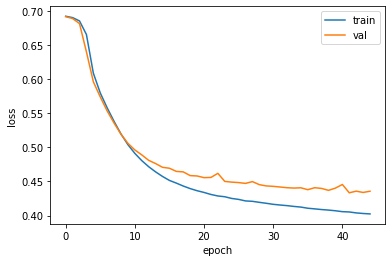

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6922 - accuracy: 0.5392 - val_loss: 0.6912 - val_accuracy: 0.5926
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.5951 - val_loss: 0.6874 - val_accuracy: 0.6342
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6836 - accuracy: 0.6328 - val_loss: 0.6784 - val_accuracy: 0.6590
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6624 - accuracy: 0.6755 - val_loss: 0.6296 - val_accuracy: 0.7004
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5904 - accuracy: 0.7153 - val_loss: 0.5664 - val_accuracy: 0.7284
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5571 - accuracy: 0.7336 - val_loss: 0.5440 - val_accuracy: 0.7402
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5353 - accuracy: 0.7470 - val_loss: 0.5251 - val_accuracy: 0.7574

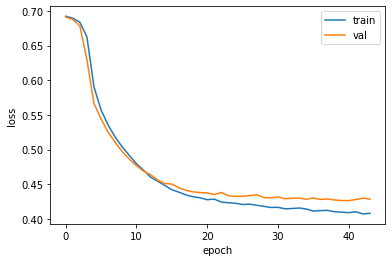

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:

model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 13ms/step - loss: 0.6929 - accuracy: 0.5308 - val_loss: 0.6925 - val_accuracy: 0.5888
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6914 - accuracy: 0.5942 - val_loss: 0.6894 - val_accuracy: 0.6494
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6805 - accuracy: 0.6273 - val_loss: 0.6594 - val_accuracy: 0.6548
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6232 - accuracy: 0.6908 - val_loss: 0.5899 - val_accuracy: 0.7106
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5731 - accuracy: 0.7272 - val_loss: 0.5555 - val_accuracy: 0.7368
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5464 - accuracy: 0.7423 - val_loss: 0.5330 - val_accuracy: 0.7512
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5242 - accuracy: 0.7578 - val_loss: 0.5151 - val_accuracy:

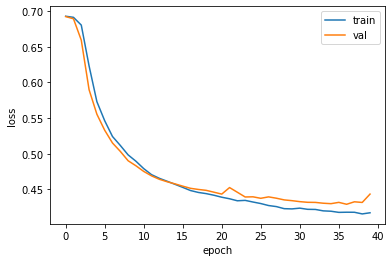

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 8ms/step - loss: 0.6924 - accuracy: 0.5317 - val_loss: 0.6918 - val_accuracy: 0.5416
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6908 - accuracy: 0.5628 - val_loss: 0.6900 - val_accuracy: 0.5600
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6880 - accuracy: 0.5922 - val_loss: 0.6866 - val_accuracy: 0.5826
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6832 - accuracy: 0.6088 - val_loss: 0.6807 - val_accuracy: 0.6078
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6750 - accuracy: 0.6234 - val_loss: 0.6718 - val_accuracy: 0.6162
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6624 - accuracy: 0.6417 - val_loss: 0.6574 - val_accuracy: 0.6324
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6431 - accuracy: 0.6558 - val_loss: 0.6350 - val_accuracy: 0.6574

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)